This notebook is based on 3 blog posts by **Jason Brownlee** on **Machine Learning Mastery** website  
The links to the posts are:  
1. https://machinelearningmastery.com/power-transforms-with-scikit-learn/  
2. https://machinelearningmastery.com/quantile-transforms-for-machine-learning/
3. https://machinelearningmastery.com/discretization-transforms-for-machine-learning/

# THEORY

# Power Transforms for Machine Learning  
Machine learning algorithms like Linear Regression and Gaussian Naive Bayes assume the numerical variables have a Gaussian probability distribution.  
you may be able to achieve better performance on a wide range of machine learning algorithms by transforming input and/or output variables to have a Gaussian or more-Gaussian distribution. **Many machine learning algorithms perform better when the distribution of variables is Gaussian**.  
Another common reason for transformations is **to remove distributional skewness**. An un-skewed distribution is one that is roughly symmetric. This means that the probability of falling on either side of the distribution’s mean is roughly equal (Page 31, Applied Predictive Modeling, 2013).  
**Power transforms** refer to a class of techniques that use a power function (like a logarithm or exponent) to make the probability distribution of a variable Gaussian or more-Gaussian like.  
removing a skew in the distribution = stabilizing the variance of the distribution  
There are two popular approaches for such automatic power transforms; they are: ***Box-Cox Transform*** & ***Yeo-Johnson Transform***  
These power transforms are available in the scikit-learn Python machine learning library via the **PowerTransformer** class.  
The class takes an argument named “**method**” that can be set to ‘yeo-johnson‘ or ‘box-cox‘ for the preferred method. It will also standardize the data automatically after the transform, meaning **each variable will have a zero mean and unit variance**. This can be turned off by setting the “standardize” argument to False.  
  
***Box-Cox Transform***  
The Box-Cox transform is named for the two authors of the method.  
It is a power transform that assumes the values of the input variable to which it is applied are **strictly positive**. That means **0 and negative values are not supported**.  
To solve the 0 and negative value problem, we can use a **MixMaxScaler transform** first to scale the data to positive values, then apply the transform.  
  
***Yeo-Johnson Transform***  
The Yeo-Johnson transform is also named for the authors.
Unlike the Box-Cox transform, it **does not require** the values for each input variable to be strictly positive. **It supports zero values and negative values**.  
Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform. We can explore this by adding a **StandardScaler** as a first step in the pipeline.  
  
    
    

# Quantile Transforms for Machine Learning  
A quantile transform will map a variable’s probability distribution to another probability distribution.  
Recall that a **quantile function**, also called a percent-point function (PPF), is the inverse of the cumulative probability distribution (CDF). A CDF is a function that returns the probability of a value at or below a given value. The PPF is the inverse of this function and returns the value at or below a given probability.  
The quantile function ranks or **smooths out** the relationship between observations and can be mapped onto other distributions, such as the **uniform** or **normal** distribution.  
This quantile transform is available in the scikit-learn Python machine learning library via the **QuantileTransformer** class.  
The class has an “**output_distribution**” argument that can be set to “uniform” or “normal” and defaults to “uniform“.  
It also provides a “**n_quantiles**” that determines the resolution of the mapping or ranking of the observations in the dataset. This must be set to a value less than the number of observations in the dataset and defaults to 1,000.  
It centers the values on **the mean value of 0 and a standard deviation of 1.0**.  
  
**Normal Quantile Transform**  
We can apply the Quantile transform using the QuantileTransformer class and set the “output_distribution” argument to “normal“. We must also set the “n_quantiles” argument to a value less than the number of observations in the training dataset.  
  
**Uniform Quantile Transform**  
Sometimes it can be beneficial to transform a highly exponential or multi-modal distribution to have a uniform distribution.
This is especially useful for data with a large and sparse range of values, e.g. **outliers that are common rather than rare**.
We can apply the transform by defining a QuantileTransformer class and setting the “output_distribution” argument to “uniform” (the default).  

# Discretization Transforms for Machine Learning  
it is often desirable to transform each input variable to have a standard probability distribution.  
One approach is to use transform of the numerical variable to have a discrete probability distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship.  
This is called a **binning** or a **discretization** transform and can improve the performance of some machine learning models for datasets by making the probability distribution of numerical input variables discrete.  
A **discretization transform** will map numerical variables onto discrete values. Values for the variable are grouped together into discrete bins and each bin is assigned a unique integer such that the ordinal relationship between the bins is preserved. The use of bins is often referred to as **binning or k-bins**, where k refers to the number of groups to which a numeric variable is mapped.  
Different methods for grouping the values into k discrete bins can be used; common techniques include:  
**Uniform**: Each bin has the same width in the span of possible values for the variable.  
**Quantile**: Each bin has the same number of values, split based on percentiles.  
**Clustered**: Clusters are identified and examples are assigned to each group.  
The discretization transform is available in the scikit-learn Python machine learning library via the **KBinsDiscretizer** class.  
The “**strategy**” argument controls the manner in which the input variable is divided, as either “uniform,” “quantile,” or “kmeans.”  
The “**n_bins**” argument controls the number of bins that will be created and must be set based on the choice of strategy, e.g. **“uniform” is flexible**, “quantile” must have a “n_bins” less than the number of observations or sensible percentiles, and “kmeans” must use a value for the number of clusters that can be reasonably found.  
The “**encode**” argument controls whether the transform will map each value to an integer value by setting “**ordinal**” or a one-hot encoding “**onehot**”. An ordinal encoding is almost always preferred, although a one-hot encoding may allow a model to learn non-ordinal relationships between the groups, such as in the case of k-means clustering strategy.  
  
**Uniform Discretization Transform**  
A uniform discretization transform will preserve the probability distribution of each input variable but will make it discrete with the specified number of ordinal groups or labels.  
  
**K-means Discretization Transform**  
A K-means discretization transform will attempt to fit k clusters for each input variable and then assign each observation to a cluster. Unless the empirical distribution of the variable is complex, the number of clusters is likely to be small, such as 3-to-5.  
  
**Quantile Discretization Transform**  
A quantile discretization transform will attempt to split the observations for each input variable into k groups, where the number of observations assigned to each group is approximately equal. Unless there are a large number of observations or a complex empirical distribution, the number of bins must be kept small, such as 5-10.

# CODE

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

C:\Users\shaya\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shaya\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shaya\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
# for practice, we will use the Sonar Dataset which is available on Jason's Github.
# It involves 60 real-valued inputs and a 2-class target variable. 
# There are 208 examples in the dataset and the classes are reasonably balanced.
# K-nearest neighbor is used as the base model to compare the transformations

# load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = pd.read_csv(url, header=None)

# pd.dataframe to np.array
data = dataset.values

# separating input and output
X = data[:,:-1]
y = data[:,-1]

# ensuring the input is float and output is integer
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

# defining the model
model = KNeighborsClassifier()

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_original = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy Original: {round(np.mean(n_scores_original),4)}\nStandard Deviation Original: {round(np.std(n_scores_original),4)}')

Accuracy Original: 0.8144
Standard Deviation Original: 0.0725


In [8]:
# Box-Cox transformation
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline

# definign the pipeline
scaler = MinMaxScaler(feature_range=(1,2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline_box_cox = Pipeline(steps=[('s',scaler),('p',power),('m',model)])

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_box_cox = cross_val_score(pipeline_box_cox,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy Box-Cox: {round(np.mean(n_scores_box_cox),4)}\nStandard Deviation Box-Cox: {round(np.std(n_scores_box_cox),4)}')

Accuracy Box-Cox: 0.821
Standard Deviation Box-Cox: 0.0644


In [9]:
# Yeo-Johnson trasformation
from sklearn.preprocessing import StandardScaler

# definign the pipeline
scaler = StandardScaler()
power = PowerTransformer(method='yeo-johnson')
model = KNeighborsClassifier()
pipeline_yeo_johnson = Pipeline(steps=[('s',scaler),('p',power),('m',model)])

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_yeo_johnson = cross_val_score(pipeline_yeo_johnson,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy Yeo-Johnson: {round(np.mean(n_scores_box_cox),4)}\nStandard Deviation Yeo-Johnson: {round(np.std(n_scores_box_cox),4)}')

Accuracy Yeo-Johnson: 0.821
Standard Deviation Yeo-Johnson: 0.0644


In [10]:
# Normal Quantile Transformation
from sklearn.preprocessing import QuantileTransformer

# definign the pipeline
normal_quantile_transform = QuantileTransformer(n_quantiles=100,output_distribution='normal')
model = KNeighborsClassifier()
pipeline_normal_quantile = Pipeline(steps=[('t',normal_quantile_transform),('m',model)])

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_normal_quantile = cross_val_score(pipeline_normal_quantile,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy Normal Quntile Transformation: {round(np.mean(n_scores_normal_quantile),4)}\nStandard Deviation Normal Quntile Transformation: {round(np.std(n_scores_normal_quantile),4)}')

Accuracy Normal Quntile Transformation: 0.817
Standard Deviation Normal Quntile Transformation: 0.088


In [11]:
# Uniform Quantile Transformation

# definign the pipeline
uniform_quantile_transform = QuantileTransformer(n_quantiles=100,output_distribution='uniform')
model = KNeighborsClassifier()
pipeline_uniform_quantile = Pipeline(steps=[('t',uniform_quantile_transform),('m',model)])

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_uniform_quantile = cross_val_score(pipeline_uniform_quantile,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy Uniform Quntile Transformation: {round(np.mean(n_scores_uniform_quantile),4)}\nStandard Deviation Uniform Quntile Transformation: {round(np.std(n_scores_uniform_quantile),4)}')

Accuracy Uniform Quntile Transformation: 0.8452
Standard Deviation Uniform Quntile Transformation: 0.0624


We chose the number of quantiles as an arbitrary number, in this case, 100.  
This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model.  
The example below performs this experiment and plots the mean accuracy for different “n_quantiles” values from 1 to 99.  

In [14]:
models = dict()
for i in range(1,100):
    trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    
# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

results = list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(np.mean(scores))
    print(f'{name:{5}} accuracy: {round(np.mean(scores),5):{10}}, std: {round(np.std(scores),5)}')

1     accuracy:    0.46617, std: 0.01234
2     accuracy:    0.83222, std: 0.07477
3     accuracy:    0.84491, std: 0.06908
4     accuracy:    0.85317, std: 0.06092
5     accuracy:    0.85143, std: 0.06359
6     accuracy:    0.84485, std: 0.05811
7     accuracy:    0.83849, std: 0.06157
8     accuracy:    0.84841, std: 0.0617
9     accuracy:    0.84675, std: 0.06212
10    accuracy:    0.84167, std: 0.06514
11    accuracy:    0.84024, std: 0.06219
12    accuracy:    0.84039, std: 0.06309
13    accuracy:    0.84198, std: 0.06409
14    accuracy:    0.84206, std: 0.06503
15    accuracy:     0.8419, std: 0.06043
16    accuracy:    0.84183, std: 0.0632
17    accuracy:    0.84356, std: 0.06385
18    accuracy:    0.84198, std: 0.06526
19    accuracy:    0.84198, std: 0.06409
20    accuracy:    0.84031, std: 0.06308
21    accuracy:    0.84039, std: 0.06428
22    accuracy:    0.84515, std: 0.06238
23    accuracy:    0.84039, std: 0.06428
24    accuracy:    0.84356, std: 0.06385
25    accuracy:   

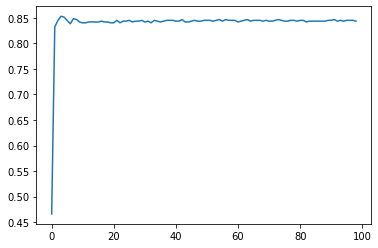

In [18]:
plt.plot(results)

In [20]:
# Uniform Discretization Transformation

from sklearn.preprocessing import KBinsDiscretizer

# definign the pipeline
uniform_discretizer = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform')
model = KNeighborsClassifier()
pipeline_uniform_discretizer = Pipeline(steps=[('t',uniform_discretizer),('m',model)])

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_uniform_discretizer = cross_val_score(pipeline_uniform_discretizer,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy Uniform Discretization Transformation: {round(np.mean(n_scores_uniform_discretizer),4)}\nStandard Deviation Uniform Discretization Transformation: {round(np.std(n_scores_uniform_discretizer),4)}')

Accuracy Uniform Discretization Transformation: 0.8451
Standard Deviation Uniform Discretization Transformation: 0.0732


In [21]:
# K-means Discretization Transformation

# definign the pipeline
kmeans_discretizer = KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans')
model = KNeighborsClassifier()
pipeline_kmeans_discretizer = Pipeline(steps=[('t',kmeans_discretizer),('m',model)])

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_kmeans_discretizer = cross_val_score(pipeline_kmeans_discretizer,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy K-means Discretization Transformation: {round(np.mean(n_scores_kmeans_discretizer),4)}\nStandard Deviation K-means Discretization Transformation: {round(np.std(n_scores_kmeans_discretizer),4)}')

Accuracy K-means Discretization Transformation: 0.8224
Standard Deviation K-means Discretization Transformation: 0.0795


In [22]:
# Quantile Discretization Transformation

# definign the pipeline
quantile_discretizer = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
model = KNeighborsClassifier()
pipeline_quantile_discretizer = Pipeline(steps=[('t',quantile_discretizer),('m',model)])

# model evaluation
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
n_scores_quantile_discretizer = cross_val_score(pipeline_quantile_discretizer,X,y,scoring='accuracy',cv=cv,n_jobs=-1, error_score='raise')
print(f'Accuracy Qantile Discretization Transformation: {round(np.mean(n_scores_quantile_discretizer),4)}\nStandard Deviation Qantile Discretization Transformation: {round(np.std(n_scores_quantile_discretizer),4)}')

Accuracy Qantile Discretization Transformation: 0.8449
Standard Deviation Qantile Discretization Transformation: 0.0678


We chose the number of bins as an arbitrary number; in this case, 10.  
This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model.

In [23]:
models = dict()
for i in range(2,11):
    trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print(f'{name:{5}} accuracy: {round(np.mean(scores),5):{10}}, std: {round(np.std(scores),5)}')

2     accuracy:    0.82547, std: 0.06784
3     accuracy:    0.86407, std: 0.06537
4     accuracy:    0.84841, std: 0.06928
5     accuracy:    0.84644, std: 0.06797
6     accuracy:       0.84, std: 0.04908
7     accuracy:    0.85159, std: 0.06092
8     accuracy:    0.84833, std: 0.06696
9     accuracy:    0.84667, std: 0.05719
10    accuracy:    0.84493, std: 0.06775


{'whiskers': [<matplotlib.lines.Line2D at 0x28a7acb9f48>,
 'caps': [<matplotlib.lines.Line2D at 0x28a7acc1108>,
 'boxes': [<matplotlib.lines.Line2D at 0x28a7acb6908>,
 'medians': [<matplotlib.lines.Line2D at 0x28a7acccfc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x28a7acdae88>,
 'means': [<matplotlib.lines.Line2D at 0x28a7acd02c8>,
  <matplotlib.lines.Line2D at 0x28a7a99e1c8>]}

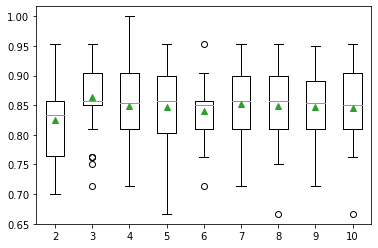

In [24]:
plt.boxplot(results,labels=names,showmeans=True)